<a href="https://colab.research.google.com/github/himanshu-thakur-7/TensorFlow-And-CNN/blob/main/ConvolutionalNuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Network with Tensorflow
Computer Vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self driving car recognizing the car in front.

In [ ]:
## get the data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2021-06-07 18:21:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   161MB/s    in 0.6s    

2021-06-07 18:21:20 (161 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data 

A very crucial step at the begining is becoming one with the data.
And for computer vision projects .. this usually means visualizing many samples of data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os 
# walk through piza_steak directory and list the number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
# Another way to find out no of image files using os module
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[1:]
print(class_names)

['pizza' 'steak']


In [ ]:
# Lets visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setup the target directory 
  target_folder = target_dir+target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # read in the image and plot using matplotlib
  img = mpimg.imread(target_folder+'/'+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}") # show shape of the image

  return img

['1312761.jpg']
Image shape: (512, 512, 3)


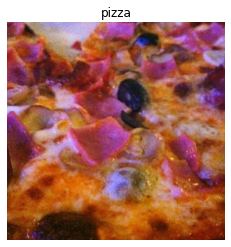

In [ ]:
# view a random image from training data set
img = view_random_image(target_dir="pizza_steak/train/",target_class="pizza");

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[134,  66,  53],
        [134,  66,  53],
        [135,  65,  55],
        ...,
        [ 57,  21,   9],
        [ 64,  28,  14],
        [ 68,  32,  18]],

       [[119,  53,  41],
        [134,  66,  55],
        [138,  70,  61],
        ...,
        [ 61,  23,  12],
        [ 66,  28,  15],
        [ 64,  27,  11]],

       [[118,  54,  44],
        [134,  67,  58],
        [129,  60,  53],
        ...,
        [ 73,  33,  21],
        [ 75,  36,  21],
        [ 66,  27,  12]],

       ...,

       [[ 60,  23,   0],
        [ 66,  26,   1],
        [ 69,  24,   1],
        ...,
        [ 61,  19,   5],
        [ 59,  17,   3],
        [ 59,  17,   3]],

       [[ 62,  22,   0],
        [ 66,  24,   0],
        [ 67,  22,   0],
        ...,
        [ 66,  24,  10],
        [ 68,  26,  12],
        [ 61,  19,   5]],

       [[ 73,  33,   8],
        [ 75,  33,   9],
        [ 73,  28,   5],
        ...,
        [ 70,  28,  1

## An end to end example
Lets build a conolutional neural network to find patterns in our images, more specifically we need a way to:
 * Load images
 * Preprocess images
 * Build a cnn to find patterns in our images
 * compile our CNN
 * fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# preprocess data (get all of the pixel values between 0 and 1, also called normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup paths
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42);
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42
                                               );

# Build a CNN (Same as tiny VGG)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),

    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),

    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid"),                          
])

# compile our cnn
model_1.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps = len(valid_data)
                        )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 195ms/step - loss: 0.5560 - accuracy: 0.7147 - val_loss: 0.4162 - val_accuracy: 0.8380
Epoch 2/5
47/47 [==============================] - 9s 182ms/step - loss: 0.4207 - accuracy: 0.8160 - val_loss: 0.3396 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3904 - accuracy: 0.8300 - val_loss: 0.3262 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 9s 182ms/step - loss: 0.3576 - accuracy: 0.8467 - val_loss: 0.3066 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 9s 181ms/step - loss: 0.3301 - accuracy: 0.8567 - val_loss: 0.2839 - val_accuracy: 0.8900


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

# using same model as before (non cnn)
Lets replicate previous section model to see if it works on image data also..


In [ ]:
# set random seed
tf.random.set_seed(42)

# create a model to replicate the Tensprflow PlayGround model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])
# compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data)
                        )


Epoch 1/5
47/47 [==============================] - 8s 172ms/step - loss: 0.9294 - accuracy: 0.5060 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 168ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 167ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 168ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 168ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# upgrading model 2 by adding more layers to model 2

# set random seed
tf.random.set_seed(42)

# create the model 
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),

])

# compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# fit the model
model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data)
            )

Epoch 1/5
47/47 [==============================] - 8s 172ms/step - loss: 1.4751 - accuracy: 0.6320 - val_loss: 1.0630 - val_accuracy: 0.5840
Epoch 2/5
47/47 [==============================] - 8s 170ms/step - loss: 0.6166 - accuracy: 0.7300 - val_loss: 0.5508 - val_accuracy: 0.7560
Epoch 3/5
47/47 [==============================] - 8s 170ms/step - loss: 0.5506 - accuracy: 0.7520 - val_loss: 0.6452 - val_accuracy: 0.6960
Epoch 4/5
47/47 [==============================] - 8s 169ms/step - loss: 0.6029 - accuracy: 0.7393 - val_loss: 0.8414 - val_accuracy: 0.6420
Epoch 5/5
47/47 [==============================] - 8s 169ms/step - loss: 0.5932 - accuracy: 0.7393 - val_loss: 0.5738 - val_accuracy: 0.7200


# Binary Classification Breakdown:
1. Become one with data
2. Preprocess the data (prepared it for our model , the main step here was scaling / normalizing)
3. create a model
4. fit the model
5. evaluate the model
6. Adjust the different parameters and improve thr model
7. Repeat until satisfied (Experiment , Experiment, Experiment)

## 1. Become one with the data

['2614649.jpg']
Image shape: (512, 384, 3)
['1688838.jpg']
Image shape: (512, 512, 3)


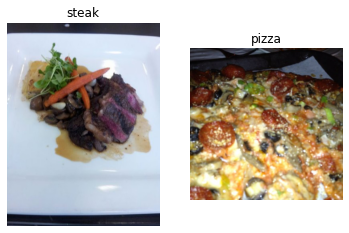

In [ ]:
# visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img  = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

## 2. Preprocess the data (Preparing for the model)


In [ ]:
# define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/" 

In [ ]:
!nvidia-smi

Mon Jun  7 18:24:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    30W /  70W |   2270MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Our next step is to turn data into batches.
A batch is a small subset of data .Rather than looking ~10,000 iamges at a time , model might only look at 32 at a time . It is good for following reasons :
1. ~10,000 images (or more ) might not fit into  memory of the processor (GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32 ? because it is good for health :) (acc to yean lakun (NYU)

In [ ]:
# create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255.)
test_data_gen = ImageDataGenerator(rescale=1/255.)


In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_data_gen.flow_from_directory(directory=train_dir, # Target directory of images
                                                target_size=(224,224), # Target size of images (height,width)
                                                batch_size=32, # type of data you are working with
                                                class_mode="binary") # size of minibatches to load data into

test_data = test_data_gen.flow_from_directory(target_size=(224,224),
                                              directory=test_dir,
                                              batch_size=32,
                                              class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of of training data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [ ]:
# how many batches are there ?
len(train_data)

47

In [ ]:
images[0].shape

(224, 224, 3)

In [ ]:
images[0]

array([[[0.47058827, 0.40784317, 0.34509805],
        [0.4784314 , 0.427451  , 0.3647059 ],
        [0.48627454, 0.43529415, 0.37254903],
        ...,
        [0.8313726 , 0.70980394, 0.48627454],
        [0.8431373 , 0.73333335, 0.5372549 ],
        [0.87843144, 0.7725491 , 0.5882353 ]],

       [[0.50980395, 0.427451  , 0.36078432],
        [0.5058824 , 0.42352945, 0.35686275],
        [0.5137255 , 0.4431373 , 0.3647059 ],
        ...,
        [0.82745105, 0.7058824 , 0.48235297],
        [0.82745105, 0.70980394, 0.5058824 ],
        [0.8431373 , 0.73333335, 0.5372549 ]],

       [[0.5254902 , 0.427451  , 0.34901962],
        [0.5372549 , 0.43921572, 0.36078432],
        [0.5372549 , 0.45098042, 0.36078432],
        ...,
        [0.82745105, 0.7019608 , 0.4784314 ],
        [0.82745105, 0.7058824 , 0.49411768],
        [0.8352942 , 0.7176471 , 0.5137255 ]],

       ...,

       [[0.77647066, 0.5647059 , 0.2901961 ],
        [0.7803922 , 0.53333336, 0.22352943],
        [0.79215693, 0

In [ ]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

## 3. create a CNN model 
A baseline is a relatively simple model or existing result that you set up when begining a machine learning experiments, you try to beat the baseline

In Deep learining there are infinte no of architecture.. so start with the simple one and the move up the complexity based on data.

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import  Sequential


In [ ]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
      Conv2D(filters=10, # filter is the number of sliding window going across the input
             kernel_size=3, # the size of the sliding window accross window across an input 
             strides=1,    # the size of the step of the sliding window takes across the input
             padding = "valid", # if "same" output shape is same as input shape , if "valid" output shape gets conpressed
             activation="relu",
             input_shape=(224,224,3), # input layer
             ),
             Conv2D(10,3,activation="relu"),
             Conv2D(10,3,activation="relu"),

             Flatten(),
             Dense(1,activation="sigmoid") # output layer
])

In [ ]:
# compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"]
                )


In [ ]:
# get summary of model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(train_data), len(test_data)

(47, 16)

In [ ]:
# fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 189ms/step - loss: 0.9601 - accuracy: 0.6567 - val_loss: 0.5041 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4794 - accuracy: 0.7907 - val_loss: 0.4186 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 9s 182ms/step - loss: 0.3660 - accuracy: 0.8533 - val_loss: 0.3687 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 9s 182ms/step - loss: 0.2470 - accuracy: 0.9167 - val_loss: 0.3692 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 9s 182ms/step - loss: 0.1110 - accuracy: 0.9687 - val_loss: 0.4282 - val_accuracy: 0.8360


In [ ]:
model_4.evaluate(test_data)

16/16 [==============================] - 2s 127ms/step - loss: 0.4282 - accuracy: 0.8360


[0.42822906374931335, 0.8360000252723694]

In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 128ms/step - loss: 0.2839 - accuracy: 0.8900


[0.28392407298088074, 0.8899999856948853]

## 5. Evaluating our model
It looks like moddel is learning something .. so evaluate it


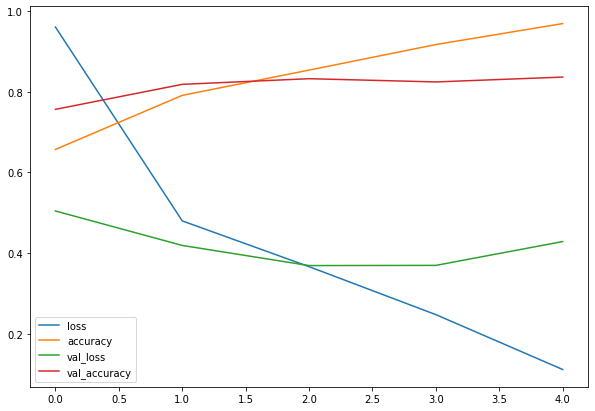

In [ ]:
# plotting training curves..
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));


In [ ]:
# Plot the validation and training curves separately 
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # plot loss
  plt.plot(epochs, loss,label="training loss")
  plt.plot(epochs, val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

  

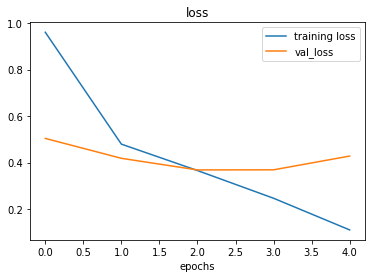

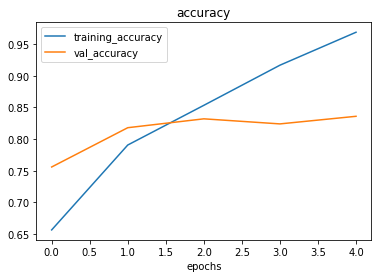

In [ ]:
plot_loss_curves(history_4)

Note: when the model's validation loss starts to increase. Its likely the model is overfitting the trained data set ie. the model's ability to generalize to unseen data is diminished.

In [ ]:
# create the model with max pooling layers (Our new baseline)
model_5 = Sequential([
      Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
      MaxPool2D(pool_size=2),
      Conv2D(10,3,activation="relu"),
      MaxPool2D(),
      Conv2D(10,3,activation="relu"),
      MaxPool2D(),
      Flatten(),
      Dense(1,activation="sigmoid")
])

In [ ]:
# compile the model
model_5.compile(loss="binary_crossentropy",optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 182ms/step - loss: 0.5860 - accuracy: 0.6940 - val_loss: 0.4544 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 8s 174ms/step - loss: 0.4797 - accuracy: 0.7707 - val_loss: 0.4093 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4298 - accuracy: 0.8120 - val_loss: 0.3657 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4049 - accuracy: 0.8273 - val_loss: 0.3537 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 8s 173ms/step - loss: 0.3692 - accuracy: 0.8400 - val_loss: 0.3316 - val_accuracy: 0.8520


In [ ]:
model_5.evaluate(test_data)

16/16 [==============================] - 2s 123ms/step - loss: 0.3316 - accuracy: 0.8520


[0.3316195607185364, 0.8519999980926514]

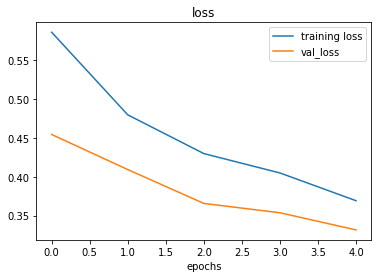

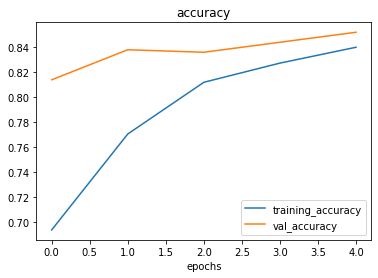

In [ ]:
plot_loss_curves(history_5)

**reducing overfitting is called regularization**

## Data Augmentation

In [ ]:
# create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255. , 
                                              rotation_range = 0.2, # how much do u want to rotate the image?
                                              shear_range = 0.2, # how much u want to shear the image
                                              zoom_range=0.2,  # zoom in randomly on an image
                                              width_shift_range = 0.2, # move ur image around on the x- axis
                                              height_shift_range = 0.3, # move ur image around on the y axis
                                              horizontal_flip = True # do you want to flip the image horizontally
                                              )
# create ImageDataGen without augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
# create ImageDataGen without data augmentationfor test data set
test_datagen = ImageDataGenerator(rescale=1/255.)

**Data Augmentation is the process of altering our training data, leading it tot have more diversity and in turn allowing allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image and flipping it cropping it or something similar**





In [ ]:
# Imprt data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="binary",
                                                                    shuffle=False)   # for demosntration purpose

# create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)
IMG_SIZE = (224,224)
# create non-augmented test data batches
print("Non augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size = 32,
                                             class_mode = "binary")


Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non augmented test data
Found 500 images belonging to 2 classes.


**Note** Data augmentation is performed  only on training data. Using `ImageDataGenerator` built in data augmentation parameters our images are left as they are in the dicrectories but are modified as they are loaded into model.

In [ ]:
# visualize the augmented data
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 18


(-0.5, 223.5, 223.5, -0.5)

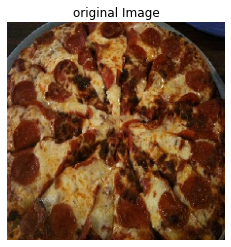

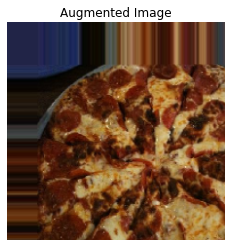

In [ ]:
# show original and augmented image
import random
random_number = random.randint(0,32) # 32 is our batch size
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

In [ ]:
# training model on augmented data

model_6 = Sequential([
      Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
      MaxPool2D(pool_size=2),
      Conv2D(10,3,activation="relu"),
      MaxPool2D(),
      Conv2D(10,3,activation="relu"),
      MaxPool2D(),
      Flatten(),
      Dense(1,activation="sigmoid")
])


# compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# fit the model 
history_6 = model_6.fit(train_data_augmented,  # fitting model on augmented data
                        epochs=5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 20s 421ms/step - loss: 0.7228 - accuracy: 0.4760 - val_loss: 0.6900 - val_accuracy: 0.5040
Epoch 2/5
47/47 [==============================] - 20s 418ms/step - loss: 0.6906 - accuracy: 0.5253 - val_loss: 0.6668 - val_accuracy: 0.7900
Epoch 3/5
47/47 [==============================] - 20s 416ms/step - loss: 0.7038 - accuracy: 0.5427 - val_loss: 0.6806 - val_accuracy: 0.5040
Epoch 4/5
47/47 [==============================] - 19s 415ms/step - loss: 0.6883 - accuracy: 0.5233 - val_loss: 0.6298 - val_accuracy: 0.5300
Epoch 5/5
47/47 [==============================] - 19s 415ms/step - loss: 0.6695 - accuracy: 0.6167 - val_loss: 0.5978 - val_accuracy: 0.7820


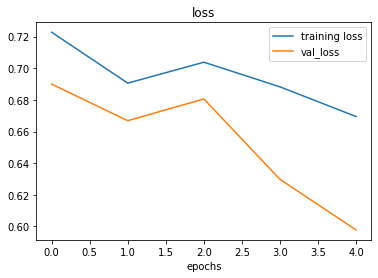

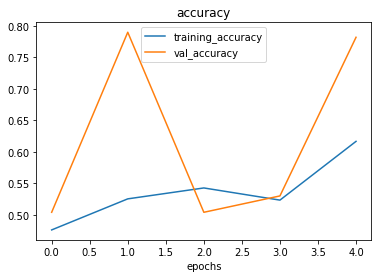

In [ ]:
# check model's training curve
plot_loss_curves(history_6)

Lets shuffle our augmented training data and train another model on it

In [ ]:
# import the data and augment it from trining data

train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                         target_size=(224,224),
                                                                         class_mode="binary",
                                                                         batch_size=32,
                                                                         shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# create model to be trained on augmented shuffled data
model_7 = Sequential([
    Conv2D(32,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(32,3,activation="relu"),
    MaxPool2D(),
    Conv2D(32,3,activation="relu"),
    MaxPool2D(),
    Conv2D(32,3,activation="relu"),
    MaxPool2D(),
    Conv2D(32,3,activation="relu"),
    MaxPool2D(),
    Conv2D(32,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [ ]:
# compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=10,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                        ) 

Epoch 1/10
47/47 [==============================] - 21s 431ms/step - loss: 0.6859 - accuracy: 0.5367 - val_loss: 0.6269 - val_accuracy: 0.7460
Epoch 2/10
47/47 [==============================] - 20s 421ms/step - loss: 0.5979 - accuracy: 0.6840 - val_loss: 0.4342 - val_accuracy: 0.8100
Epoch 3/10
47/47 [==============================] - 20s 422ms/step - loss: 0.5364 - accuracy: 0.7233 - val_loss: 0.4118 - val_accuracy: 0.8440
Epoch 4/10
47/47 [==============================] - 20s 422ms/step - loss: 0.5241 - accuracy: 0.7507 - val_loss: 0.3753 - val_accuracy: 0.8820
Epoch 5/10
47/47 [==============================] - 20s 419ms/step - loss: 0.5034 - accuracy: 0.7707 - val_loss: 0.3852 - val_accuracy: 0.8720
Epoch 6/10
47/47 [==============================] - 20s 422ms/step - loss: 0.4854 - accuracy: 0.7727 - val_loss: 0.3595 - val_accuracy: 0.8600
Epoch 7/10
47/47 [==============================] - 20s 420ms/step - loss: 0.5362 - accuracy: 0.7580 - val_loss: 0.3672 - val_accuracy: 0.8680

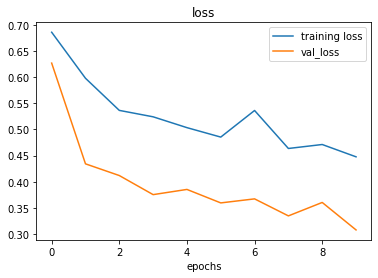

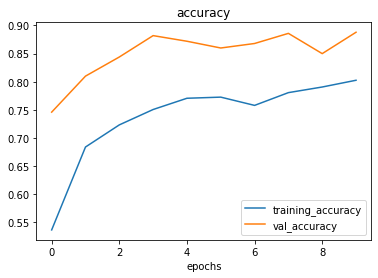

In [ ]:
# plot the loss curves
plot_loss_curves(history_7)

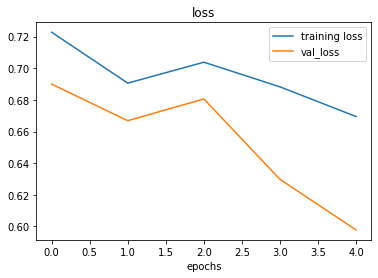

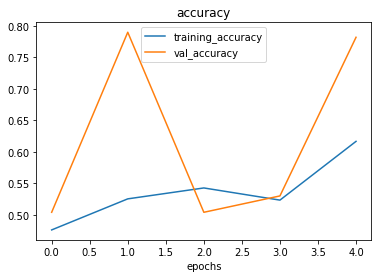

In [ ]:
plot_loss_curves(history_6)

In [ ]:
## making a prediction with our trained model on custom data
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.image as mpimg
steak = mpimg.imread("steak.jpeg")
plt.imshow(steak)
plt.axis(False);

FileNotFoundError: ignored

In [ ]:
steak.shape

In [ ]:
steak

In [ ]:
expanded_steak = tf.expand_dims(steak,axis=0)
steak.shape , expanded_steak.shape

In [ ]:
model_7.predict(expanded_steak)

 when training a neural network then you want to make a prediction with it on your own custom data, it's important that the custom data is preprocesssed to same format as the training data.

In [ ]:
# create a function to import and resize image to b able to be used with our trained model
def load_and_prep_image(file_name,img_shape=224):
  """
  reads an image form file turns into tensor and reshapes it tot (img_shape,img_shape,color_channels)

  """
  # Read in the image 
  img  = tf.io.read_file(file_name)
  # decode the read file into a tensor
  img =  tf.image.decode_image(img)
  # resize the img
  img  =  tf.image.resize(img,size=[img_shape,img_shape])
  # rescale the image (get all values between 0 and 1)
  img = img/255.
  return img
  

In [ ]:
steak = load_and_prep_image("steak.jpeg")

In [ ]:
steak

In [ ]:
pred = model_7.predict(tf.expand_dims(steak,axis=0))
pred

In [ ]:
class_names

In [ ]:
# index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred))]
pred_class

In [ ]:
def pred_and_plot(model,file_name,class_names=class_names):
  """
  Import an image located at filename , makes a prediction with the model and plots the 
  image with predicted class as title
  """
  # import the target image and preprocess it 
  img = load_and_prep_image(file_name)

  # make a prediction
  pred = model.predict(tf.expand_dims(img,axis=0))
  pred_class = class_names[int(tf.round(pred))]

  # plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False);

In [ ]:
# test our model on a custom image
pred_and_plot(model_7,"steak.jpeg")

In [ ]:
pred_and_plot(model_7,"pizza.jpg")

In [ ]:
pred_and_plot(model_7,"pizza_2.jpeg")

# Multi class classification

We've gone through a bunch of the following steps with binary classification .. Now gonna apply same stuff using multi classification using 10 classes.

1. Become one with the data 
2. Preprocess the data
3. Create the model (BaseLine)
4. Fit the model (overfit tot make sure it learns)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try reducing overfitting)
7. Repeat until satisfied

##1 import and become one with data


In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()


--2021-06-07 18:36:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 2607:f8b0:400e:c02::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   213MB/s    in 2.3s    

2021-06-07 18:36:04 (213 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 

In [ ]:
# set up train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# let's get the classnames
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1973447.jpg']
Image shape: (384, 512, 3)


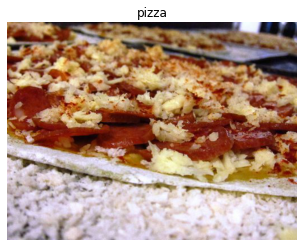

In [ ]:
# viusalize, visualize, visualize
import random 
img = view_random_image(target_dir=train_dir,target_class=random.choice(class_names))

## 2. Preprocess Data


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# load Data
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_data_gen.flow_from_directory(test_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
## create a CNN  model baseline

# TO Do : Take the model from CNN Explainer website and replicate it..


In [ ]:
# make some imports
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import  Sequential


In [ ]:
tf.random.set_seed(42)
# 1 create the model 

model_8 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding="valid",
         input_shape=(224,224,3),
         activation="relu"
         ),
   Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding="valid",
         activation="relu"
         ),
     MaxPool2D(),
     Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding="valid",
         activation="relu"
         ),
     Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding="valid",
         activation="relu"
         ),
     MaxPool2D(),
     Flatten(),
     Dense(10,activation="softmax") # change to 10 output neurons and activation softmax
              
])

#compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])


In [ ]:
# fit the model
history_8 = model_8.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))


Epoch 1/5
235/235 [==============================] - 44s 184ms/step - loss: 2.1166 - accuracy: 0.2331 - val_loss: 2.0021 - val_accuracy: 0.2792
Epoch 2/5
235/235 [==============================] - 42s 180ms/step - loss: 1.8900 - accuracy: 0.3497 - val_loss: 1.8635 - val_accuracy: 0.3564
Epoch 3/5
235/235 [==============================] - 42s 181ms/step - loss: 1.5616 - accuracy: 0.4729 - val_loss: 1.9551 - val_accuracy: 0.3180
Epoch 4/5
235/235 [==============================] - 42s 181ms/step - loss: 1.0108 - accuracy: 0.6715 - val_loss: 2.3542 - val_accuracy: 0.3228
Epoch 5/5
235/235 [==============================] - 44s 186ms/step - loss: 0.4449 - accuracy: 0.8600 - val_loss: 3.4372 - val_accuracy: 0.2788


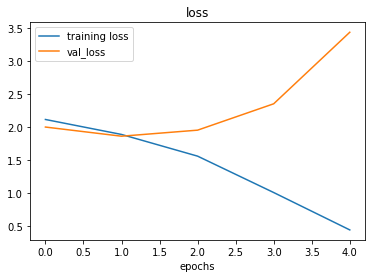

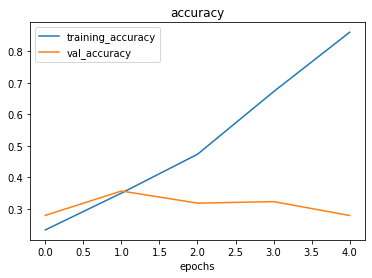

In [ ]:
# Evaluate model
plot_loss_curves(history_8)

model is overfitting badly

# beating overfitting
Due to its performance on training data it's clear our model is learning something ..

However its not generalizing well to unseen data

Tricks:
* get more data
* data augmentation
* reduce number of layers

In [ ]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 28090)            

In [ ]:
tf.random.set_seed(42)

model_9 = Sequential([
   Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
   MaxPool2D(),
   Conv2D(10,3,activation="relu"),
   MaxPool2D(),
   Flatten(),
   Dense(10,activation="softmax")
])

model_9.compile(loss= "categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
________________________________________________

In [ ]:
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 41s 171ms/step - loss: 2.1183 - accuracy: 0.2321 - val_loss: 1.9504 - val_accuracy: 0.3096
Epoch 2/5
235/235 [==============================] - 40s 170ms/step - loss: 1.8604 - accuracy: 0.3589 - val_loss: 1.8892 - val_accuracy: 0.3356
Epoch 3/5
235/235 [==============================] - 40s 170ms/step - loss: 1.5212 - accuracy: 0.5009 - val_loss: 1.8941 - val_accuracy: 0.3448
Epoch 4/5
235/235 [==============================] - 40s 170ms/step - loss: 1.0151 - accuracy: 0.6884 - val_loss: 2.1590 - val_accuracy: 0.3216
Epoch 5/5
235/235 [==============================] - 40s 170ms/step - loss: 0.5442 - accuracy: 0.8419 - val_loss: 2.5392 - val_accuracy: 0.3136


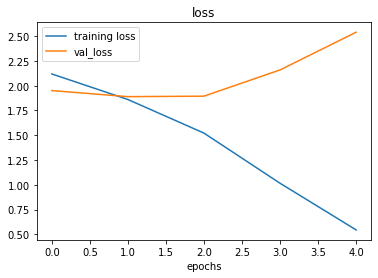

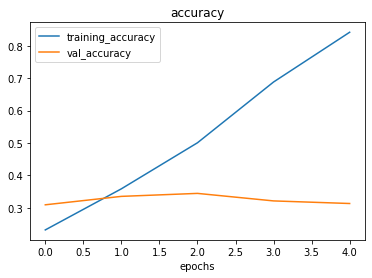

In [ ]:
plot_loss_curves(history_9)

In [ ]:
## Trying data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
# lets create another model fitting on teh augmented training data
model_10  = tf.keras.models.clone_model(model_8)

# compile the cloned model
model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"]) 

In [ ]:
model_10.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 28090)            

In [ ]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 28090)            

In [ ]:
history_10=model_10.fit(train_data_augmented,
             epochs=10,
             steps_per_epoch=len(train_data_augmented),
             validation_data=test_data,
             validation_steps=len(test_data)
             )

Epoch 1/10
235/235 [==============================] - 100s 425ms/step - loss: 2.2678 - accuracy: 0.1521 - val_loss: 2.1694 - val_accuracy: 0.2020
Epoch 2/10
235/235 [==============================] - 100s 425ms/step - loss: 2.1979 - accuracy: 0.1884 - val_loss: 2.0886 - val_accuracy: 0.2540
Epoch 3/10
235/235 [==============================] - 99s 423ms/step - loss: 2.1648 - accuracy: 0.2072 - val_loss: 2.0618 - val_accuracy: 0.2620
Epoch 4/10
235/235 [==============================] - 100s 425ms/step - loss: 2.1116 - accuracy: 0.2409 - val_loss: 1.9352 - val_accuracy: 0.3244
Epoch 5/10
235/235 [==============================] - 99s 422ms/step - loss: 2.0480 - accuracy: 0.2803 - val_loss: 1.9028 - val_accuracy: 0.3536
Epoch 6/10
235/235 [==============================] - 99s 421ms/step - loss: 1.9856 - accuracy: 0.3080 - val_loss: 1.7724 - val_accuracy: 0.3972
Epoch 7/10
235/235 [==============================] - 99s 420ms/step - loss: 1.9364 - accuracy: 0.3313 - val_loss: 1.8073 - val

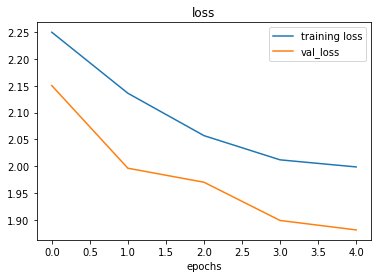

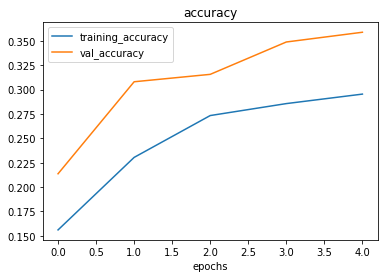

In [ ]:
plot_loss_curves(history_10)

In [ ]:
prep_and_load()

NameError: ignored